## Utilities plotting

In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
from matplotlib.collections import PatchCollection
import os.path as osp

In [3]:
def preprocessing(bird, data_folder="data", filename_base="value_policy"):
    info = pd.read_csv(osp.join(data_folder,"env_info.csv"))
    episodes=info['episodes_num'][0]
    states=info['state_space_dim'][0]
    episodes_step=info['episode_write_step'][0]
    df = pd.read_csv(osp.join(data_folder, filename_base + str(bird) +".csv"))
    df["State"] = [i%states for i in range(episodes*states//episodes_step)]
    df["Episode"] = [(i//states)*episodes_step for i in range(episodes*states//episodes_step)]
    index = ['Episode', 'State']
    df.set_index(index, inplace=True)
    return df

#Extract policy
def extract_policy(df):
    d = df[["left", "straight", "right"]]
    d = d.unstack("State")
    #Softmax
    m = d.mean(axis=1, level=1)
    d = d.subtract(m,axis=0)
    d = d.apply(np.exp)
    s = d.sum(axis=1, level=1)
    d = d.divide(s,axis=0)
    return d

def extract_value(df):
    d = df["value"]
    d = d.unstack("State")
    return d

In [4]:
def state_re_conv(state):
    """
        Convert state to dictionary
    """
    #TODO: add sectors to info file
    info = pd.read_csv("data/env_info.csv")
    sectors = info["sectors"].item()
    base = info["states_per_sector"].item()
    is_directed = info["is_directed"].item()
    
    if(is_directed):
        base = base*2
        
    #base -= 1 #Base is the state per sector minus 1
    
    if(not is_directed):
        
        out_dict = {}
        #each key is the sector, having as element who is in it, be it a string or a tuple 
        for i in range(sectors):
            int_key = (state//(base**i))%base
            
            if(int_key == 0):
                out_dict[i] = 'none'
            elif(int_key == 1):
                out_dict[i] = 'foe'
            elif(int_key == 2):
                out_dict[i] == 'brother'
            elif(int_key == 3):
                out_dict[i] = 'both'
              
    else:
        
        out_dict = {}
        #each key is the sector, having as element who is in it, be it a string or a tuple 
        for i in range(sectors):
            #print(base**i)
            int_key = (state//(base**i))%base
            #print(int_key)
            
            if(int_key == 0 or int_key == (base)//2):
                out_dict[i] = 'none'
            elif(int_key == 1):
                out_dict[i] = 'foe_in'
            elif(base > 5 and int_key == 2):
                out_dict[i] = 'brother_in'
            elif(base > 7 and int_key == 3):
                out_dict[i] = 'both_in'
            elif(int_key == (base)//2+1):
                out_dict[i] = 'foe_out'
            elif(int_key == (base)//2+2):
                out_dict[i] = 'brother_out'
            elif(int_key == (base)//2+3):
                out_dict[i] = 'both_out'
    

    return out_dict

def obs_to_state(obs):
    """
        Transforms a dictionary defining an observation into the index of a state.
        Works only if observation is directed and we have overwrite mode on for now.
        The observation is defined like
        obs = {sector_num (int) : sector_status (['none','foe_in','foe_out','brother_in','brother_out'])}
    """
    info = pd.read_csv("data/env_info.csv")
    sectors = info["sectors"].item()
    is_directed = bool(info["is_directed"].item())     
    
    state = np.empty([sectors,1])
    for i in range(sectors): 
        if obs[i] == 'none':
            state[i] = 0
        if obs[i] == 'foe_in':
            state[i] = 1
        if obs[i] == 'brother_in':
            state[i] = 2
        if obs[i] == 'foe_out':
            state[i] = 3
        if obs[i] == 'brother_out':
            state[i] = 4
    
    state_num = 0

    for i in range(sectors):
        state_num+=state[i]*pow(5,i)
        
    return int(state_num)

{0: 'foe_in', 1: 'none', 2: 'none', 3: 'none', 4: 'none'}
{0: 'brother_out', 1: 'foe_in', 2: 'none', 3: 'none', 4: 'none'}
{0: 'brother_out', 2: 'foe_in', 1: 'none', 3: 'none', 4: 'none'}
{0: 'brother_out', 3: 'foe_in', 1: 'none', 2: 'none', 4: 'none'}
{0: 'brother_out', 4: 'foe_in', 1: 'none', 2: 'none', 3: 'none'}
{1: 'brother_out', 0: 'foe_in', 2: 'none', 3: 'none', 4: 'none'}
{1: 'foe_in', 0: 'none', 2: 'none', 3: 'none', 4: 'none'}
{1: 'brother_out', 2: 'foe_in', 0: 'none', 3: 'none', 4: 'none'}
{1: 'brother_out', 3: 'foe_in', 0: 'none', 2: 'none', 4: 'none'}
{1: 'brother_out', 4: 'foe_in', 0: 'none', 2: 'none', 3: 'none'}
{2: 'brother_out', 0: 'foe_in', 1: 'none', 3: 'none', 4: 'none'}
{2: 'brother_out', 1: 'foe_in', 0: 'none', 3: 'none', 4: 'none'}
{2: 'foe_in', 0: 'none', 1: 'none', 3: 'none', 4: 'none'}
{2: 'brother_out', 3: 'foe_in', 0: 'none', 1: 'none', 4: 'none'}
{2: 'brother_out', 4: 'foe_in', 0: 'none', 1: 'none', 3: 'none'}
{3: 'brother_out', 0: 'foe_in', 1: 'none', 2: 

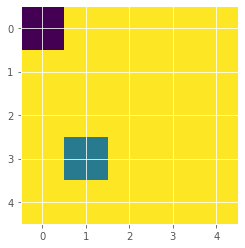

In [95]:
#def plot_policy(bird):
sectors = 5
df = preprocessing(1)
df = extract_policy(df)

left_df = df['left']
straight_df = df['straight']
right_df = df['right'].iloc[-1]

right_policy = np.empty((sectors,sectors)) #stick to case in which a prey sees predator and just one other prey
for i in range(sectors):
    for j in range(sectors):
        state = {i:'brother_out'}
        state[j] = 'foe_in'
        for k in range(sectors):
            if k not in (i,j):
                state[k] = 'none'
                
        print(state)
        state_id = obs_to_state(state)
        right_policy[i,j] = right_df[state_id]
                
print(right_policy)
plt.imshow(right_policy)

In [92]:
a = np.empty((2,2))
a[0,0] = 1
a

array([[  1.   , 170.408],
       [ 13.575, 180.408]])

In [19]:
def value_at_conv(bird):
    plt.style.use('fivethirtyeight')
    df = preprocessing(bird)
    df_val = extract_value(df)
    df_val = df_val.loc[:, (df_val != df_val.iloc[0]).any()]
    steady_df = df_val[-10:].mean()
    df_val = df_val - steady_df
    df_val.plot(legend=False, title="Bird_"+str(bird)+" value", ylabel="V - V[steady]")

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

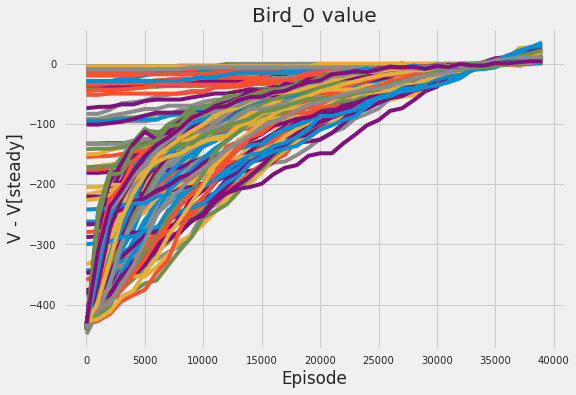

In [20]:
value_at_conv(0)

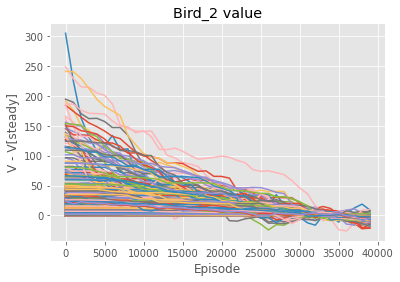

In [8]:
value_at_conv(2)

In [134]:
state_re_conv(729)

{0: 'none', 1: 'foe_in', 2: 'brother_in', 3: 'none', 4: 'none'}

In [ ]:
df = preprocessing(filename="data/value_policy.csv")
df_val = extract_value(df,1)
df_val.loc[:, (df_val != df_val.iloc[0]).any()].plot(legend=False)
#This is more convergent for policies

<AxesSubplot:xlabel='Episode'>

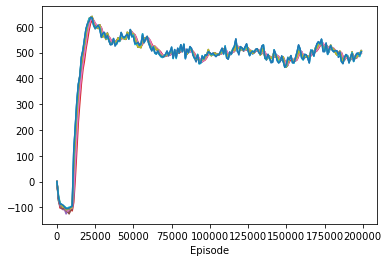

In [6]:
df = preprocessing(filename="data/value_policy.csv")
df_val = extract_value(df,2)
df_val.loc[:, (df_val != df_val.iloc[0]).any()].plot(legend=False)
#This is more convergent for policies

<AxesSubplot:xlabel='Episode'>

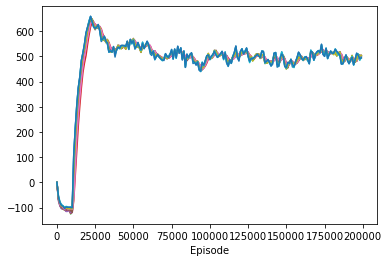

In [7]:
df = preprocessing(filename="data/value_policy.csv")
df_val = extract_value(df,3)
df_val.loc[:, (df_val != df_val.iloc[0]).any()].plot(legend=False)
#This is more convergent for policies

<AxesSubplot:xlabel='Episode'>

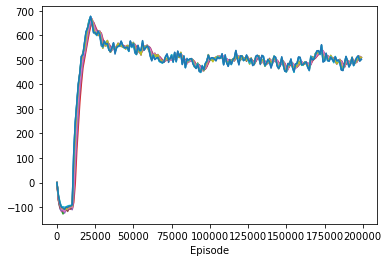

In [8]:
df = preprocessing(filename="data/value_policy.csv")
df_val = extract_value(df,4)
df_val.loc[:, (df_val != df_val.iloc[0]).any()].plot(legend=False)
#This is more convergent for policies

## Diagnostic tools

-30.00001285727039


,episode,bird,sec0,sec1,sec2
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,0,0,0
3,0,3,0,0,0
4,0,4,0,0,0


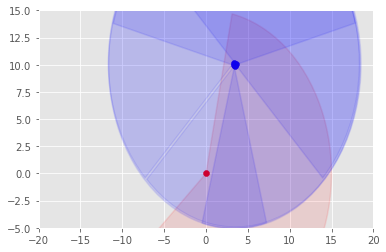

In [20]:
def select_frame(ep,frame=0,birds_num=10):
    df = pd.read_csv("data/pursuer_trajectory.csv")
    df = df[df["Episode"]==ep].iloc[frame]
    
    fig, ax = plt.subplots(1,1)
    patches = []
    
    ax.scatter(df["x"+str(0)],df["y"+str(0)], color="red")
    print(df["alpha"+str(0)]*180/math.pi)
    wedge = mpatches.Wedge((df["x"+str(0)], df["y"+str(0)]), 15, 
                           df["alpha"+str(0)]*180/math.pi - 6*18, df["alpha"+str(0)]*180/math.pi + 6*18, 
                           alpha=0.1, lw=1.5, color="red")
    patches.append(wedge)
    
    for i in range(1,birds_num):
        ax.scatter(df["x"+str(i)],df["y"+str(i)], color="blue")
        wedge = mpatches.Wedge((df["x"+str(i)], df["y"+str(i)]), 15, 
                           df["alpha"+str(i)]*180/math.pi - 135, df["alpha"+str(i)]*180/math.pi + 135, 
                           alpha=0.1, lw=1.5, color="blue")
        patches.append(wedge)
    
        
    collection = PatchCollection(patches, match_original=True)
    ax.add_collection(collection)
    ax.set_xlim(-20,20)
    ax.set_ylim(-5,15)
        
    return ax

ep = 0
fr = 0
bn = 5
select_frame(ep, frame=fr, birds_num=bn)

df = pd.read_csv("data/observations.csv")
df = df[df["episode"]==ep]
df.iloc[fr*bn:(fr+1)*bn]

## Policy animation

In [33]:
df = preprocessing(0)
df

value      left  straight     right
Episode State                                        
0       0     -0.730847  0.021829  0.031946  0.027815
        1      0.000000  0.100000  0.100000  0.100000
        2      0.000000  0.100000  0.100000  0.100000
        3      0.000000  0.100000  0.100000  0.100000
        4      0.000000  0.100000  0.100000  0.100000
...                 ...       ...       ...       ...
99000   7771   0.000000  0.100000  0.100000  0.100000
        7772   0.000000  0.100000  0.100000  0.100000
        7773   0.000000  0.100000  0.100000  0.100000
        7774   0.000000  0.100000  0.100000  0.100000
        7775   0.000000  0.100000  0.100000  0.100000

[777600 rows x 4 columns]

In [34]:
def obs_to_state(obs, sec_num=5, state_per_sector=3):
    """
        Transforms a dictionary defining an observation into the index of a state.
        The observation is defined like
        obs = {'none':[0,1], 'evader':[bla], 'pursuer':[bla]}
    """
    state = np.empty([sec_num,1])
    for i in obs['none']:
        state[i] = 0
    for i in obs['foe']:
        state[i] = 1
    for i in obs['brother']:
        state[i] = 2
    for i in obs['both']:
        state[i] = 3
    
    state_num = 0

    for i in range(sec_num):
        state_num+=state[i]*pow(state_per_sector,i)
        
    return int(state_num)

def state_to_color(state, sec_num=5, base=3):
    col = ["white" for i in range(sec_num)]
    state_base = np.empty(sec_num)
    for i in range(0,sec_num):
        state_base[i] = (state//base**i)%base
    
    for i in range(sec_num):
        if state_base[i] == 0:
            col[i] = "white"
        elif state_base[i] == 1:
            col[i] = "red" #Now stands for foe
        elif state_base[i] == 2:
            col[i] = "blue"  #Now stands for brother
        elif state_base[i] == 3:
            col[i] = "purple"
            
    return col

def create_wedge(state, ax, sec_num=5, state_per_sector=3):

    patches = []
    
    # add the vision cone
    sector_angle = 180/(sec_num)
    min_ang = 0
    max_ang = sector_angle
    col = state_to_color(state, sec_num, state_per_sector)
    for i in range(sec_num):
        wedge = mpatches.Wedge((1, 1), 2, min_ang, max_ang, 
                               alpha=0.1, lw=1.5, color=col[i])
        min_ang += sector_angle
        max_ang += sector_angle
        patches.append(wedge)

    x = [2*math.cos(-math.pi/(sec_num)*i)+1 for i in range(1,sec_num)]
    y = [2*math.sin(math.pi/(sec_num)*i)+1 for i in range(1,sec_num)]

    for i in range(sec_num-1):
        ax.plot([1,x[i]],[1,y[i]], color="cornflowerblue", lw=0.3)
    
    t_p = np.array([[0,0], [1/2,math.sqrt(3)/2], [1,0]])*1/2  + np.array([3/4,1/2])
    
    # Simplex outside sectors
    t = mpatches.Polygon(t_p, alpha=0.2, lw=2)
    patches.append(t)
       
    return patches, t_p #, t_coord

In [ ]:
obs_to_state()

In [18]:
def plot_policy_ep(bird, obs, episode=-1, birds_num=2, sec_num=3, state_per_sector=2):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(10,6))
    state = obs_to_state(obs, sec_num, state_per_sector)
    patches, t_p = create_wedge(state, ax, sec_num, state_per_sector)
    collection = PatchCollection(patches, match_original=True)
    
    plt.axis('equal')
    plt.axis('off')
    
    df = preprocessing(filename="data/value_policy.csv")
    df = extract_policy(df, bird)
    
    if episode == -1:
        df = df.iloc[-1] #Number of episode
    else :
        df = df.loc[episode]
    
    #df.reset_index(drop=True,inplace=True)
    x = (df[("right_"+str(bird),)] - df[("left_"+str(bird),)])/2 + 0.5
    y = df[("straight_"+str(bird),)]*math.sqrt(3)/2
    s_point = t_p[0] + np.array([x[state]/2, y[state]/2])
    ax.scatter(s_point[0], s_point[1])
    ax.add_collection(collection)

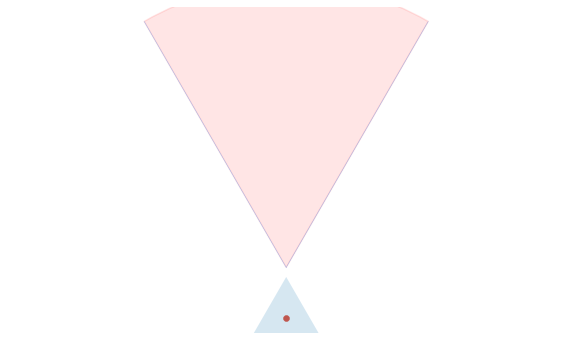

In [19]:
plot_policy_ep(0, {"none":[0,2], "foe":[1], "brother":[], "both":[]}, birds_num=2, sec_num=3, state_per_sector=2)

In [102]:
def animate_policy(bird, obs, birds_num=2, sec_num=3, base=1):
    plt.style.use('ggplot')
    fig, ax = plt.subplots()
    points = ax.scatter([], [], color="darkblue", s=sec_num)

    #patches, tp, t_coord = create_wedge(state)
    state = obs_to_state(obs)
    patches, t_p = create_wedge(state, ax, sec_num, base)

    collection = PatchCollection(patches, match_original=True)
    ax.add_collection(collection)
    plt.axis('equal')
    plt.axis('off')
    t = plt.text(-1,3,"Episode 0")
    t.set_color('red')
    plt.tight_layout()

    #Data preparation
    df = preprocessing(filename="data/value_policy.csv")
    df = extract_policy(df, bird)
    df.reset_index(drop=True,inplace=True)
    x = (df[("right_"+str(bird),)] - df[("left_"+str(bird),)])/2 + 0.5
    y = df[("straight_"+str(bird),)]*math.sqrt(3)/2
    sec_num = len(df)

    x = x[state]
    y = y[state]
    #print(x)

    def animate(i):
        #p = np.empty([6,2])
        s_point = t_p[0] + np.array([x[i]/2, y[i]/2])
        p = [s_point[0], s_point[1]]
        #p[0,:] = [s_point[0], s_point[1]]

        #for j,k in enumerate(sectors[:0:-1]):
            #s_point = t_coord[j] + np.array([x[k][i]/2, y[k][i]/2])
            #p[j+1,:] = [s_point[0][0], s_point[0][1]]

        points.set_offsets(p)
        t.set_text("Episode "+str(i*1000))
        if ((i*1000)//20000)%birds_num == 0:
            t.set_color('red')
        else:
            t.set_color('blue')
        return points,t,

    anim = animation.FuncAnimation(fig, animate, frames=len(x), interval=20, blit=True)
    return anim

KeyError: 'pursuer'

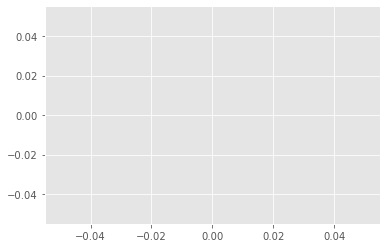

In [27]:
anim_p = animate_policy(1,{'none':[0,1,2], 'evader':[3]},birds_num=2)
HTML(anim_p.to_html5_video())